# Fit AdapIF to HH Spike Trains

In [1]:
from brian2 import *
from brian2modelfitting import *

import numpy as np

INFO       Cache size for target "cython": 1101 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/alteska/.cython/brian_extensions" directory. [brian2]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]
WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyte

In [2]:
dt = 0.01*ms
defaultclock.dt = dt

## Load the Data

In [3]:
voltage1 = genfromtxt('voltage1nA.csv', delimiter=',')
voltage2 = genfromtxt('voltage2nA.csv', delimiter=',')

In [4]:
inp_cur1 = genfromtxt('inp_cur1nA.csv', delimiter=',')
inp_cur2 = genfromtxt('inp_cur2nA.csv', delimiter=',')
inp_current = [inp_cur1, inp_cur2]
inp_current

[array([0.        , 0.05553714, 0.18616409, ..., 0.34263957, 0.23894004,
        0.24489567]),
 array([ 0.        , -0.08325095,  0.03536872, ...,  0.76675788,
         0.90452414,  1.0627096 ])]

In [5]:
out_spikes1 = genfromtxt('out_spikes1nA.csv', delimiter=',')
out_spikes2 = genfromtxt('out_spikes2nA.csv', delimiter=',')
out_spikes = [out_spikes1, out_spikes2]
out_spikes

[array([  71.23,  122.83,  210.92,  225.54,  239.2 ,  281.24,  303.7 ,
         336.2 ,  399.15,  536.37,  597.07,  663.54,  811.95,  939.29,
         962.57,  991.39, 1009.98, 1035.9 , 1078.18, 1113.35, 1155.7 ,
        1200.08, 1270.3 , 1293.  , 1315.59, 1467.74, 1488.74, 1522.48,
        1554.55, 1571.92, 1670.46, 1705.1 , 1730.37, 1746.35, 1793.  ,
        1866.76, 1892.38, 1937.42, 1948.02, 1986.21, 2111.73, 2171.24,
        2276.79, 2418.89, 2440.3 , 2546.8 , 2584.71, 2599.82, 2662.19,
        2837.62, 2961.99, 3005.25, 3059.41, 3177.22, 3190.72, 3252.33,
        3349.37, 3418.14, 3466.01, 3521.96, 3604.86, 3638.6 , 3660.36,
        3680.88, 3691.25, 3720.41, 3829.22, 3867.82, 3904.32, 3951.12,
        3961.46, 4031.54, 4085.24, 4118.16, 4163.5 , 4199.79, 4264.13,
        4357.91, 4377.63, 4440.7 , 4477.18, 4573.26, 4614.94, 4676.63,
        4696.7 , 4713.32, 4843.36]),
 array([4.81000e+00, 2.39700e+01, 6.56500e+01, 7.03400e+01, 1.01920e+02,
        1.10710e+02, 1.17300e+02, 2.47

## Model Fitting

In [6]:
# tau = 12.44*ms
# taut = 97.64*ms
# a = 0.21
# alpha = 7.2*mV
# R = 76*Mohm

model = '''
        dv/dt = (R*I- v)/tau :volt
        dvt/dt = (a*v - vt) / taut :volt
        alpha : volt (constant)
        a : 1 (constant)
        R : ohm (constant)
        tau : second (constant)
        taut : second (constant)
        '''
reset = '''
v = 0*mV
vt = vt + alpha
'''

In [7]:
n_opt = NevergradOptimizer()
metric = GammaFactor(time=1*second, delta=10*ms)

In [8]:
fitter = SpikeFitter(model=model, input_var='I', dt=dt,
                     input=inp_current * nA, output=out_spikes,
                     n_samples=30,
                     threshold='v > vt',
                     reset=reset,
                     refractory=1.4*ms,
                     param_init={'v': -65*mV},
                     )

In [9]:
result_dict, error = fitter.fit(n_rounds=10,
                                optimizer=n_opt,
                                metric=metric,
                                callback='text',
                                alpha=[5,10]*mV,
                                a = [0.1, 1],
                                R = [1, 100]*Mohm, 
                                tau = [10, 13]*ms,
                                taut = [90, 100]*ms,
                               )

Round 0: fit (0.005936473280774522, 0.09667089632215349, 0.010877646550169245, 0.7732139091368697, 65216495.66505) with error: 0.4263912627243325
Round 1: fit (0.005897791496556089, 0.09717624978846025, 0.012190883016771662, 0.8852577297166475, 80740101.77571365) with error: 0.3180133967189165
Round 2: fit (0.005740473423037291, 0.09844819520688476, 0.010876398798504938, 0.8170729401045497, 85337735.89943385) with error: 0.25144063761192936
Round 3: fit (0.005446031669469218, 0.09767022266948727, 0.010318469001472591, 0.7453920747868659, 88124535.42044634) with error: 0.23426536921346608
Round 4: fit (0.005532412956638396, 0.09767022266948727, 0.010318469001472591, 0.8551314506427847, 92478076.67543101) with error: 0.22357836971615674
Round 5: fit (0.005516283190762642, 0.09720875650285189, 0.010305892937037521, 0.8247432174459154, 90873035.12157136) with error: 0.2192942028326776
Round 6: fit (0.005549082880981181, 0.0943307964580303, 0.01016464957717852, 0.8435805742908024, 91775439.

In [10]:
result_dict

{'alpha': 0.005582432396097993,
 'taut': 0.09080193246683038,
 'tau': 0.010095341045464484,
 'a': 0.726182827966676,
 'R': 94260882.05350363}

In [11]:
error

0.21026096026096025

In [12]:
1 - error

0.7897390397390398

In [13]:
# visualization of the results
spikes = fitter.generate_spikes(params=None)
print('spike times:', spikes)

spike times: [array([  47.08,   48.48,   49.88,   60.37,   69.34,   70.74,   96.43,
        121.37,  122.77,  178.18,  208.26,  209.66,  218.96,  230.85,
        240.42,  243.72,  285.44,  303.2 ,  381.1 ,  383.2 ,  398.35,
        400.79,  465.59,  503.78,  525.37,  533.66,  588.94,  590.34,
        595.9 ,  655.51,  660.86,  662.81,  666.42,  774.51,  775.91,
        803.65,  806.88,  809.62,  838.33,  850.38,  931.37,  932.77,
        934.17,  935.62,  937.23,  939.83,  953.6 ,  989.86,  994.88,
       1010.24, 1011.69, 1035.65, 1076.7 , 1111.73, 1118.39, 1133.75,
       1156.15, 1171.24, 1199.22, 1267.99, 1269.39, 1288.89, 1291.99,
       1314.68, 1391.05, 1432.64, 1434.04, 1448.68, 1466.7 , 1468.1 ,
       1487.21, 1489.  , 1520.94, 1551.95, 1566.67, 1571.83, 1652.1 ,
       1658.89, 1669.97, 1673.21, 1702.64, 1726.69, 1729.94, 1737.61,
       1759.18, 1792.8 , 1861.89, 1866.15, 1869.46, 1889.53, 1934.11,
       1936.78, 1941.33, 1985.04, 1986.91, 2094.5 , 2097.63, 2109.68,
      

In [14]:
print(len(out_spikes[0]))
print(len(spikes[0]))

87
221


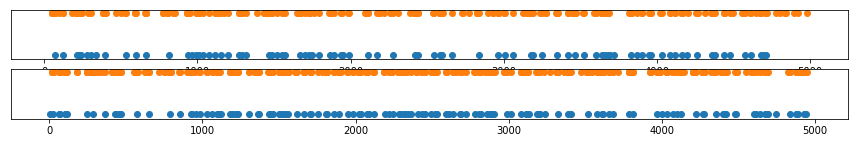

In [15]:
d=-1

fig, ax = plt.subplots(nrows=2, figsize=(15,2))

ax[0].set_yticks(np.arange(0, 1, step=1))
ax[0].scatter(out_spikes[0][:d], np.ones_like(out_spikes[0][:d]));
ax[0].scatter(spikes[0][:d], np.ones_like(spikes[0][:d])*2);

ax[1].set_yticks(np.arange(0, 1, step=1))
ax[1].scatter(out_spikes[1][:d], np.ones_like(out_spikes[1][:d]));
ax[1].scatter(spikes[1][:d], np.ones_like(spikes[1][:d])*2);

In [16]:
fits = fitter.generate(params=None, output_var='v',)

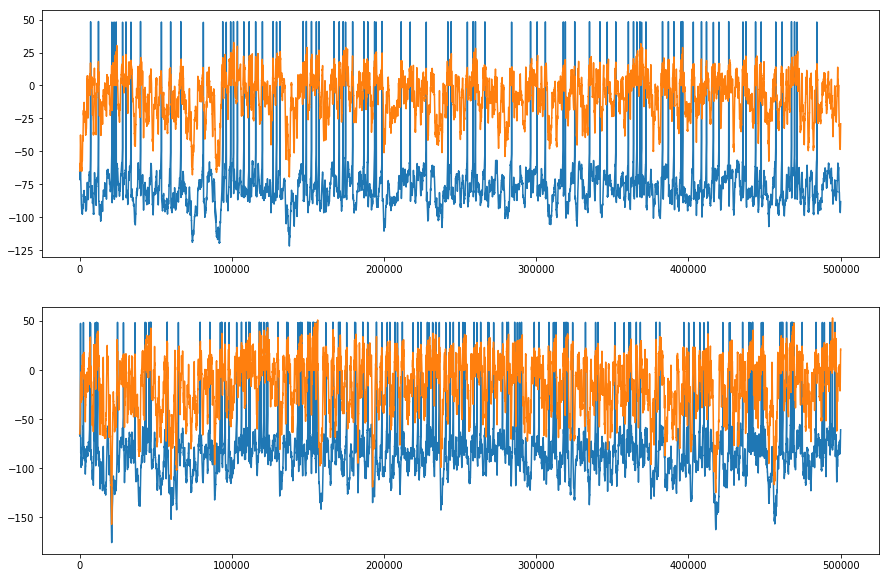

In [17]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))

ax[0].plot(voltage1);
ax[0].plot(fits[0]/mV)

ax[1].plot(voltage2);
ax[1].plot(fits[1]/mV);
